# The Command DP & the Proxy DP #

## <font color="green">Special Java addendum to core Python lecture series</font> ##

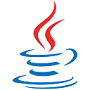

### Richard Mather ###

### November, 2021###

## Command is a 'Behavioural' DP and 'Proxy' is a 'Structural DP' ##

## Both Command and Proxy have object-level scope ##

## There is no special relationship between these two patterns apart from the fact they are frequently implemented ##

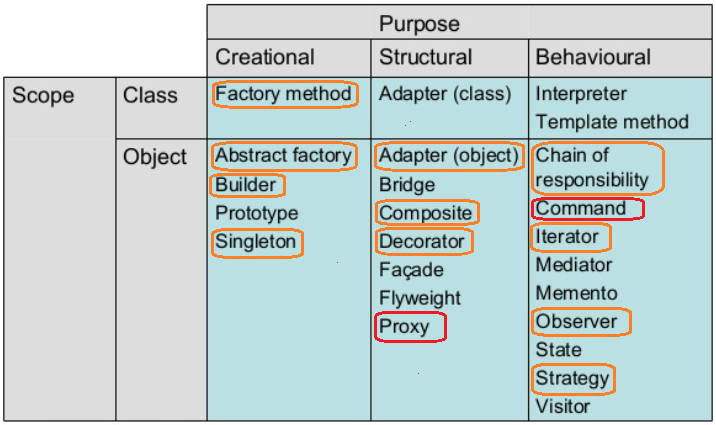


## Running Java in Jupyter ##

- Third party kernels are available for many languages and flavours of these.
- Kernels are available for Java (several options), R, Julia, Matlab, Octave, Scheme, Processing, Scala and many more languages
- Once installed, kernels may be switched at run time from the notebook Kernel\Change kernel menu
- Here we install the SciJava kernel through Anconda (https://anaconda.org/conda-forge/scijava-jupyter-kernel)
    - Open Anaconda
    - Run CMD.exe
    - Enter "**<font color="red">conda install -c conda-forge/label/cf201901 scijava-jupyter-kernel</font>**"
    - Open a Jupyter notebook and specify kernel before or select afterwards
    - If all goes well it will work out of-the-box
    - Because 'Groovy' is a polyglot kernel offering support for many languages there may be incompatibilities
     - ... including with various libraries 
     - ... and often with the 'main' method
     - ... with core Java code, 'main(String[] args)' issues may be resolved by removing the class wrapping the main and also the main method
     - ... see examples below


## The Command Design Pattern ##
### An object scope behavioural pattern ###

### Intent: ### 
"Encapsulate a request as an object, thereby letting you parameterize clients with different requests, queue or log requests, and support undoable operations" (Gamma et al., 1995) 
- The GoF explain that this is useful when request sending entities have no knowledge or the operation being requested or of the request receiver
- The example given is of "interface toolkits [that] include objects like buttons and menus that carry out a request in response to user input"
- However, the receivers and implementation of those requests are not known to the toolkit designers
- By turning requests into objects, these may then be stored and/or passed on to receivers that resolve them
- The key to the pattern is an **abstract Command class/interface** with an **abstract Execute() method**
- Concrete Command classes (e.g.OpenDoc below) specify "**receiver-action**" pairs 
- ... e.g. as represented by the **openDocCommand *receiver* object***, which when invoked with its concrete **execute** method ... 
- ... calls the **open() *action*-method** on a Document object
- The Java example below is modified from "https://www.tutorialspoint.com/design_pattern/command_pattern.htm"
- ... to broadly represent the key-players (entities) as they appear in the GOF's example on pp233-5 and below
- Furthermore the example includes a sequence of **actions** as they might be executed by a queue or macro 

### Structure ###

This is the generalised structure for Command as presented in Gamma et al. (1995 p236)

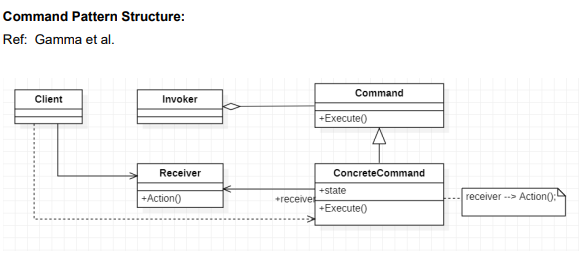

The role and mapping of entities in the general GOF structure to their example and the Java code below is as follows:

- COMMAND - provides the interface to EXECUTE an operation
- CONCRETE COMMAND (e.g. OpenDoc below) - defines the binding between the receiver (Document below) and the action (e.g. the open() method)
- CLIENT - the entity that creates a concrete command object (e.g. see ```OpenDoc openDocCommand = new OpenDoc(This_Document);``` below)
- INVOKER - in the code below it is 'Application' but this could easily be represented by a 'menu' and the menu items
- RECEIVER - in the case below, the 'Document'

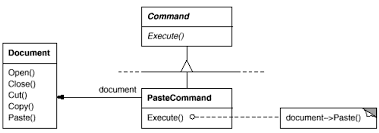

### Consequences ###

The GoF maintain that these are mainly beneficial ...
- Decouples 'request-invoking' objects from 'request-implementing' ones
- As 'commands' are first-class objects they can be managed and sub-classed/extended in the same way as other objects
- Commands can be assembled into composite/macro commands - the Composite DP is also relevant here
- Easy to add new commands without having to change existing classes

### Implementation ###

- The example below is re-engineered from "https://www.tutorialspoint.com/design_pattern/command_pattern.htm" to loosely represent the 'document' example and actions used by the GO4 - pp233-7


In [5]:
// THE COMMAND DESIGN PATTERN

import java.util.ArrayList;
import java.util.List;

//The COMMAND interface - as per GOF p234
public interface Command {
   void execute();
}

//The DOCUMENT subject with OPEN/CLOSE/CUT/COPY/PASTE methods- as per GOF p234 
// ... also the RECEIVER asp per generalized structure - GoF p236
public class Document {

   private String name = "ABC";

   public void open(){
      System.out.println("Document [ Name: "+name+" ] is opened");
   }
   public void close(){
      System.out.println("Document [ Name: "+name+" ] is closed");
   }
   public void cut(){
      System.out.println("Text in document [ Name: "+name+" ] has been cut");
   }
   public void copy(){
      System.out.println("Text in document [ Name: "+name+" ] has been copied");
   }
   public void paste(){
      System.out.println("Text in document [ Name: "+name+" ] has been pasted");
   }

}

/* The following are the COMMANDs - note GOF intent "Encapsulate a request as an object, 
 ... thereby letting you parametize clients with different requests, queue or log requests ... - GoF p233
 ... these would also correspond to the Commands of 'MenuItems' as per GoF p234 
*/

//A concrete COMMAND 
public class OpenDoc implements Command {
   private Document abcDocument;

   public OpenDoc(Document abcDocument){
      this.abcDocument = abcDocument;
   }

   public void execute() {
      abcDocument.open();
   }
}

//A concrete COMMAND
public class CloseDoc implements Command {
   private Document abcDocument;

   public CloseDoc(Document abcDocument){
      this.abcDocument = abcDocument;
   }

   public void execute() {
      abcDocument.close();
   }
}

//A concrete COMMAND
public class CutText implements Command {
   private Document abcDocument;

   public CutText(Document abcDocument){
      this.abcDocument = abcDocument;
   }

   public void execute() {
      abcDocument.cut();
   }
}

//A concrete COMMAND
public class CopyText implements Command {
   private Document abcDocument;

   public CopyText(Document abcDocument){
      this.abcDocument = abcDocument;
   }

   public void execute() {
      abcDocument.copy();
   }
}

//A concrete COMMAND
public class PasteText implements Command {
   private Document abcDocument;

   public PasteText(Document abcDocument){
      this.abcDocument = abcDocument;
   }

   public void execute() {
      abcDocument.paste();
   }
}


// The APPLICATION client or 'INVOKER' - as per GOF p234 - which does not need to know how commands are executed
public class Application {
    private List<Command> commandList = new ArrayList<Command>(); 

    public void takeCommand(Command command){
        commandList.add(command);
    }

    // A nice example of QUEUEING or of a possible MACROCOMMAND sequence
    public void executeCommandSequence(){
        for (Command command : commandList) {
            command.execute();
          }
        commandList.clear();
    }
}
                         
Document This_Document = new Document();

OpenDoc openDocCommand = new OpenDoc(This_Document);
CutText cutTextCommand = new CutText(This_Document);
CopyText copyTextCommand = new CopyText(This_Document);
PasteText pasteTextCommand = new PasteText(This_Document);
CloseDoc closeDocCommand = new CloseDoc(This_Document);

Application app = new Application();
app.takeCommand(openDocCommand);
app.takeCommand(cutTextCommand);
app.takeCommand(copyTextCommand);
app.takeCommand(pasteTextCommand);
app.takeCommand(closeDocCommand);


app.executeCommandSequence();

Document [ Name: ABC ] is opened
Text in document [ Name: ABC ] has been cut
Text in document [ Name: ABC ] has been copied
Text in document [ Name: ABC ] has been pasted
Text in document [ Name: ABC ] has been pasted
Document [ Name: ABC ] is closed


No Outputs

## The Proxy Design Pattern ##
### An object scope structural pattern ###

### Intent: ### 
"Provide a surrogate or placeholder for another object to control access to it" (Gamma et al., 1995 p207)

- The GoF explain that there are circumstances where it is desirable to either defer creating an 'expensive' object and/or provide a more sophisticated reference to an object than a simple pointer.
- Circumstances include 
 - **remote** proxies when a local representative is needed for an object in a different address space
 - **virtual** proxies which only create 'expensive' objects when they are needed (also the ImageProxy of the GOF's motivating example and the example below)
 - **protection** proxies that are useful when objects require varying levels of access right
- The GOF's **motivating example** is of large graphical/image objects that have 'expensive' consequences for document loading times
- As not all graphical/image objects will be in the document viewing frame it isn't necessary to load these, they may be replaced by virtual proxies
- The virtual **image proxy** acts as a placeholder (occupying little memory) until needed when the document editor invokes it to **Load()** the real image ...
 - along with other actions - e.g.Draw(), GetExtent(), Store() ...

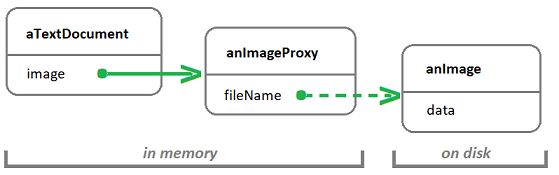

### Structure ###

The class diagram for the motivating example (from the GoF) is ...

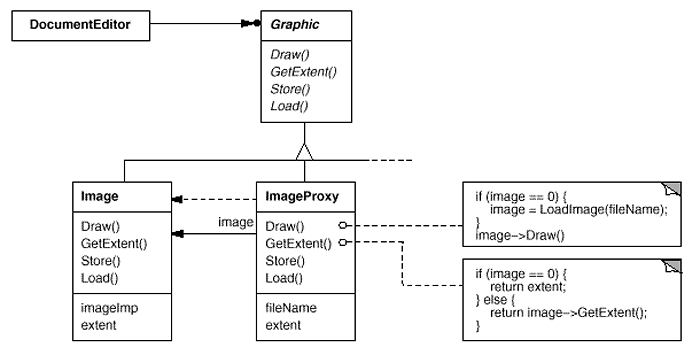

The generalised structure (as per GoF) is ...

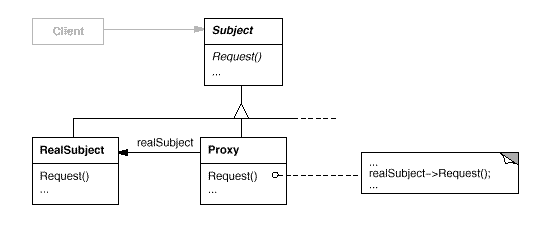


### Consequences ###

The GoF maintain that these are mainly beneficial ...
- A remote proxy can conceal a real object's address
- A virtual proxy can optimise requests - e.g. by creating real objects only when needed
- Protection proxies can enable additional 'housekeeping tasks when an object is accessed

### Implementation ###

- The example below is re-engineered from "https://www.tutorialspoint.com/design_pattern/proxy_pattern.htm" so that key entities (Graphic interface; Draw() method; Image class; ImageProxy class) map directly to the GoF motivating example on p208. It is also an abbreviated translation of sample code provided by the GoF on pp213-5
- Note: the mechanism of Proxy involves a change of state:
 - when first requested realImage is null, and the image will be loaded from disk
 - ... on subsequent requests the loaded image is stored to image.realImage and is displayed
 - ... as the image in now cached no further load from disk is necessary.


In [4]:
// THE PROXY DESIGN PATTERN

public interface Graphic {
   void draw();
}

public class RealImage implements Graphic {

   private String fileName;

   public RealImage(String fileName){
      this.fileName = fileName;
      loadFromDisk(fileName);
   }

   @Override
   public void draw() {
      System.out.println("Displaying " + fileName);
   }

   private void loadFromDisk(String fileName){
      System.out.println("Loading " + fileName);
   }
}

public class ImageProxy implements Graphic {

   private RealImage realImage;
   private String fileName;

   public ImageProxy(String fileName){
      this.fileName = fileName;
   }

   @Override
   public void draw() {
      if(realImage == null){
         System.out.println("No image in memory - must load from disk")
         realImage = new RealImage(fileName);
      }
      System.out.println("Image is now in memory - load directly")
      realImage.draw();
   }
}


System.out.println("[1] Creating proxy image ... \n");
Graphic image = new ImageProxy("test_10mb.jpg");

//image will be loaded from disk
System.out.println("\n[2] Loading image from disk ... \n");
image.draw(); 
      
//image will not be loaded from disk
System.out.println("\n[3] Loading image from memory ... \n");
image.draw();

[1] Creating proxy image ... 


[2] Loading image from disk ... 

No image in memory - must load from disk
Loading test_10mb.jpg
Image is now in memory - load directly
Displaying test_10mb.jpg

[3] Loading image from memory ... 

Image is now in memory - load directly
Displaying test_10mb.jpg


No Outputs

###### References & Learning Resources#

- Gamma, E., Helm, R., Johnson, R., & Vlissides, J. (1995). Gamma, E., Helm, R., Johnson, R., & Vlissides, J. Mar. 1995. Design Patterns–Elements of Reusable Object-Oriented Software. Addison-Wesley.
- Jungwoo Ryoo (2015) Python: Design Patterns. Available at: https://www.linkedin.com/learning/python-design-patterns and https://www.lynda.com/Python-tutorials/Design-Patterns-Python/369187-2.html
- Phillips D. (2015) Python 3 Object-oriented Programming - Second Edition. PACKT Publishing.
- Shalloway, A., & Trott, J. R. (2002). Design patterns explained: A new perspective on object-oriented design. Addison-Wesley
- Tutorialspoint (undated) Design Patterns - Command Pattern. Available at https://www.tutorialspoint.com/design_pattern/command_pattern.htm 
- Tutorialspoint (undated) Design Patterns - Proxy Pattern. Available at https://www.tutorialspoint.com/design_pattern/proxy_pattern.htm
